## Modelado de opiniones y su impacto en la generación de consensos y disensos en una plataforma de CrowdSourcing

El objetivo de la simulación es dilucidar el funcionamiento de las dinámicas de opinión en una plataforma de CrowdSourcing donde las personas expresan sus opiniones y votan las expresadas por otros bajo una serie de condiciones especificadas por el contexto de la plataforma.

In [2]:
import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = [100, 200, 500, 1000] # Cantidad de agentes que quiero en la muestra.
QOpinionesExpuestas = 5 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 15 # Cantidad de veces maxima que se muestra una opinion

# Agentes

In [5]:

#<<<<<< Agente Nulo >>>>>>

class Person (object):
    def __init__ (self, tipo,ID):
        self.Oi = self.set_Oi (tipo)
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto
        self.Valencias = []
    
    def __str__ (self):
        return "Despues lo seteo"
    
    def set_Oi (self, tipo): #
        if tipo == "uniforme":
            opinion = random.uniform (-1,1)
        # if tipo == "normal": 
            # opinion = ¤SETEAR LA OPINION NORMAL ##******************************************************************** 
        return opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)   

    def append_Valencias (self, Valencias):
        self.Valencias.append (Valencias) 

    def algvotar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar 

    def algvotarneg (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 0             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 3
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V > Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar 

    def votar (self, ideas, tipodevotacion, votospos, votosneg): 
        # Asume que se le da un dataframe con las opiniones, el tipo de votacion (aleatoria, determinista o probabilistica), 
        # la cantidad de votos positivos y la cantidad de votos negativos
        
        qideasavotar = votospos + votosneg
        
        if qideasavotar > QOpinionesExpuestas:
            raise Exception("La cantidad de ideas a votar no puede ser mayor a la cantidad de ideas expuestas")
        
        votos = votospos * [1] + votosneg * [-1]
        
        if tipodevotacion == "aleatorio":
            Votara = ideas.sample (n = qideasavotar)
            vota = []
            for i in Votara.index:
                vota.append (i)
            self.IdeasVotadas.append (vota)
            self.Valencias.append (votos)
            devuelve = pd.DataFrame(votos, vota) 
            return devuelve # Me devuelve un dataframe con el ID de la idea a votar como indice, y el tipo de voto.

        if tipodevotacion == "deterministico":
            ideas2 = ideas.copy ()
            vota = []
            for i in votos:
                if i == 1:
                    va = self.algvotar (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
                if i == -1:
                    va = self.algvotarneg (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
            self.IdeasVotadas.append (vota)
            self.Valencias.append (votos)
            devuelve = pd.DataFrame(votos, vota)
            return devuelve 
        
            
##********************************************************************            
            
        # if tipodevotacion == "probabilistico":
  
        
##******************************************************************** 

    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []



### ↓↓↓↓↓↓↓ Lo de aca abajo no importa ↓↓↓↓↓↓↓

<ipython-input-12-5785899b7099>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas


-------------------------------------------------------------------------------------
Muestra N: 100
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las menos vistas


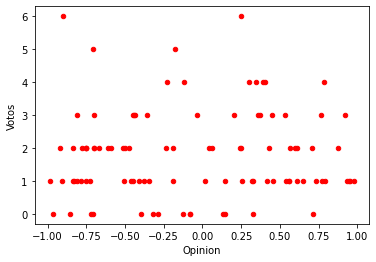

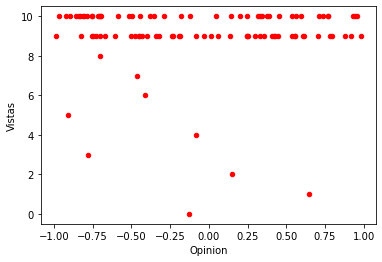

-------------------------------------------------------------------------------------
Muestra N: 200
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las menos vistas


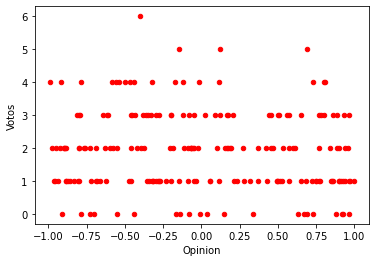

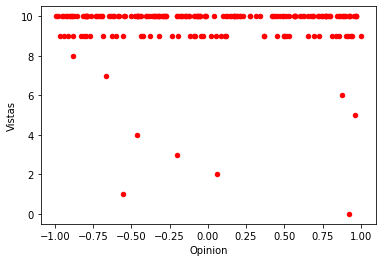

-------------------------------------------------------------------------------------
Muestra N: 500
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las menos vistas


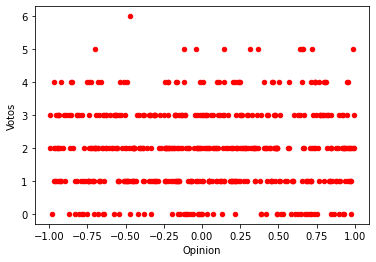

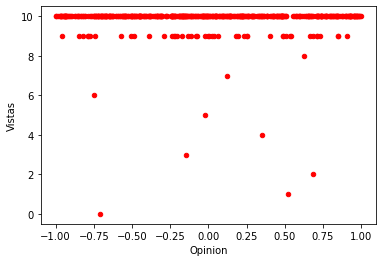

-------------------------------------------------------------------------------------
Muestra N: 1000
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las menos vistas


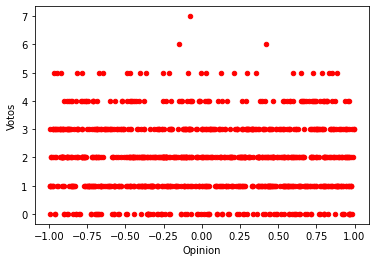

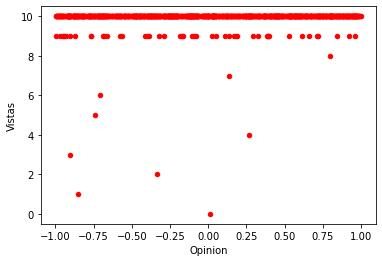

In [12]:
#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion V1 ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

#>>>>> Opinion univariada, con una distribucion uniforme en el rango [-1;1]
#>>>>> votacion positiva aleatoria de 2 ideas
#>>>>> Seleccion de ideas por cantidad de vistas (<)


# Defino a los agentes.
class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def votar (self, ideas): # Asume que se le da un dataframe con las opiniones
        Votara = ideas.sample (n=2)
        vota = []
        for i in Votara.index:
            vota.append (i)
        return vota # Me devuelve la id de la idea a votar     
    
    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []


# Creo la muestra, y les asigno la opinion
for q in TamañoDeLaMuestra:
    # Creo la muestra
    Muestra_Completa = {}
    for k in range (1,q):
        Muestra_Completa [k] = Person (np.random.uniform (-1,1),k*111) # Creo una muestra de sujetos con una Opinion distribuida uniformemente, 
                                                                       # y les asigno una id a los sujetos

            
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
    DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas']) 
    MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
    OpinanNoVotan = 0
    TiempoSimulacion = 0

    for i in Muestra_Simulacion:
        ParticipanteActual = i
        if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
            DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [OpinanNoVotan,'Votos'] = 0
            DataSave.at [OpinanNoVotan,'Vistas'] = 0
            OpinanNoVotan +=1
        else:
            OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
            OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas
            OpinionesParaVotar = OpinionesFiltradas.iloc[:QOpinionesExpuestas, :2] # Creo un dataframe con las ideas que va a ver el sujeto
            Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
            DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [i,'Votos'] = 0
            DataSave.at [i,'Vistas'] = 0
            VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
            for i in VotoActual:
                DataSave.at [i,'Votos'] = DataSave.at [i,'Votos'] + 1 # Le sumo un voto a la idea.
            for i in OpinionesParaVotar.index:
                DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas

                # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
                MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
                MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
                MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
                MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
                CopiaOpiniones = OpinionesParaVotar.index.tolist()
                CopiaOpiniones.remove(i)
                MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
                if (DataSave.at [VotoActual[0],'ID']) == (OpinionesParaVotar.at [i,'ID']) or (DataSave.at [VotoActual[1],'ID']) == (OpinionesParaVotar.at [i,'ID']):
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
                else:
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
                MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
                TiempoSimulacion +=1           

                    
    ##### Visualizo la data
    # print (MinutoAMinuto)
    print ("-------------------------------------------------------------------------------------")
    print ("Muestra N: " + str(q))
    print ("Opiniones univariadas, con una distribucion uniforme [-1,1]")
    print ("Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las menos vistas")
    #print (DataSave.sort_values(by=['Votos'], ascending=False))
    DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
    #plt.yticks(range(5))
    plt.show()




<ipython-input-13-e29c2cc14255>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas


-------------------------------------------------------------------------------------
Muestra N: 100
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de las 2 ideas mas cercanas al sujeto, del conjunto de las menos vistas


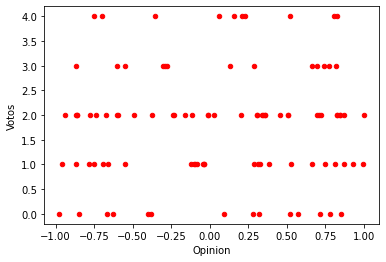

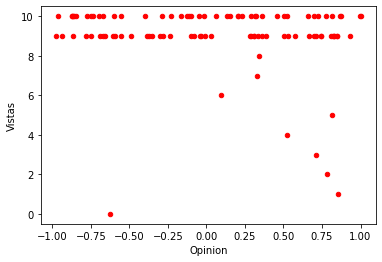

-------------------------------------------------------------------------------------
Muestra N: 200
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de las 2 ideas mas cercanas al sujeto, del conjunto de las menos vistas


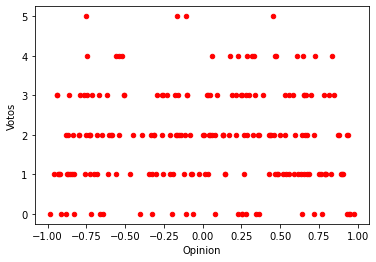

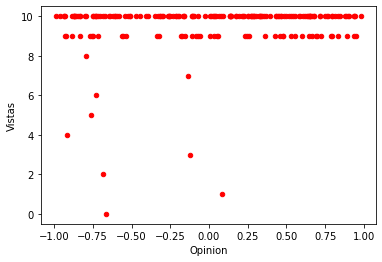

-------------------------------------------------------------------------------------
Muestra N: 500
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de las 2 ideas mas cercanas al sujeto, del conjunto de las menos vistas


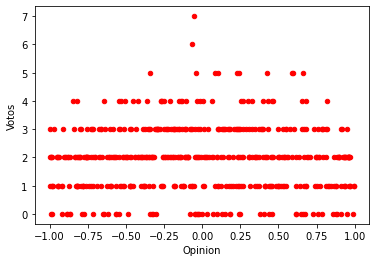

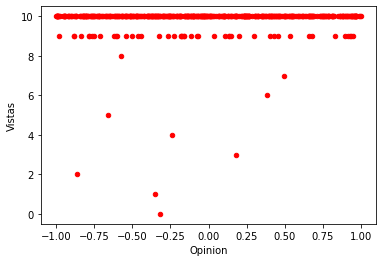

-------------------------------------------------------------------------------------
Muestra N: 1000
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de las 2 ideas mas cercanas al sujeto, del conjunto de las menos vistas


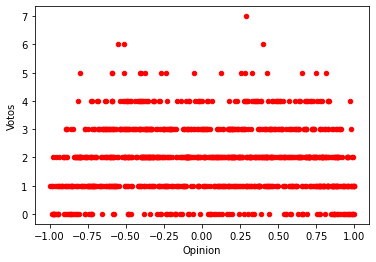

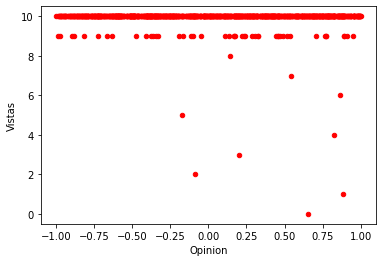

In [13]:
#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion V2 ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

### Opinion univariada, con una distribucion normal uniforme en el rango [-1;1]
### votacion positiva deterministico de 2 ideas
### Seleccion de ideas por cantidad de vistas (<)


# Defino a los agentes.
class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def algvotar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar 

    def votar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Vota1 = self.algvotar(ideas)
        ideas2 = ideas.drop (Vota1)
        Vota2 = self.algvotar(ideas2)
        Votara = [Vota1, Vota2]  #QUEDE ACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
        return Votara # Me devuelve la id de la idea a votar   
    
    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []


# Creo la muestra, y les asigno la opinion
for q in TamañoDeLaMuestra:
    # Creo la muestra
    Muestra_Completa = {}
    for k in range (1,q):
        Muestra_Completa [k] = Person (np.random.uniform (-1,1),k*111) # Creo una muestra de sujetos con una Opinion distribuida uniformemente, 
                                                                       # y les asigno una id a los sujetos

            
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
    DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas']) 
    MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
    OpinanNoVotan = 0
    TiempoSimulacion = 0

    for i in Muestra_Simulacion:
        ParticipanteActual = i
        if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
            DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [OpinanNoVotan,'Votos'] = 0
            DataSave.at [OpinanNoVotan,'Vistas'] = 0
            OpinanNoVotan +=1
        else:
            OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
            OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas
            OpinionesParaVotar = OpinionesFiltradas.iloc[:QOpinionesExpuestas, :2] # Creo un dataframe con las ideas que va a ver el sujeto
            Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
            DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [i,'Votos'] = 0
            DataSave.at [i,'Vistas'] = 0
            VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
            for i in VotoActual:
                DataSave.at [i,'Votos'] = DataSave.at [i,'Votos'] + 1 # Le sumo un voto a la idea.
            for i in OpinionesParaVotar.index:
                DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas

                # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
                MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
                MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
                MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
                MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
                CopiaOpiniones = OpinionesParaVotar.index.tolist()
                CopiaOpiniones.remove(i)
                MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
                if (DataSave.at [VotoActual[0],'ID']) == (OpinionesParaVotar.at [i,'ID']) or (DataSave.at [VotoActual[1],'ID']) == (OpinionesParaVotar.at [i,'ID']):
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
                else:
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
                MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
                TiempoSimulacion +=1           

                    
    ##### Visualizo la data
    # print (MinutoAMinuto)
    print ("-------------------------------------------------------------------------------------")
    print ("Muestra N: " + str(q))
    print ("Opiniones univariadas, con una distribucion uniforme [-1,1]")
    print ("Algoritmo de votacion positiva de las 2 ideas mas cercanas al sujeto, del conjunto de las menos vistas")
    #print (DataSave.sort_values(by=['Votos'], ascending=False))
    DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
    #plt.yticks(range(5))
    plt.show()


<ipython-input-14-78d5f198c27a>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RestoDeOpiniones.sort_values(by='Ratio', ascending=False, inplace=True)
<ipython-input-14-78d5f198c27a>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by=['Votos'], ascending=False, inplace=True) # Ordeno las ideas de mayor a menor acorde a la cantidad de votos


-------------------------------------------------------------------------------------
Muestra N: 100
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las 5 mas votadas, y 5 con mayor ratio Votos/Vista


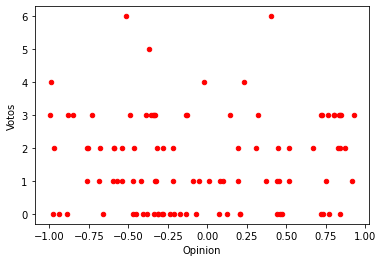

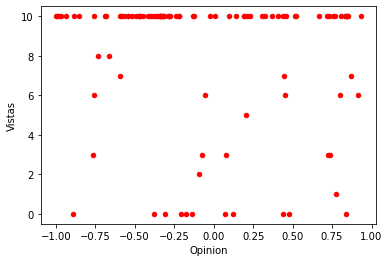

-------------------------------------------------------------------------------------
Muestra N: 200
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las 5 mas votadas, y 5 con mayor ratio Votos/Vista


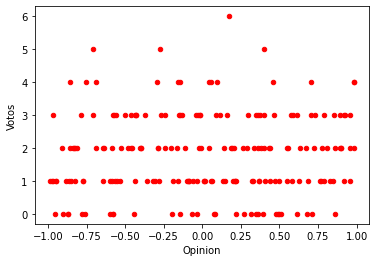

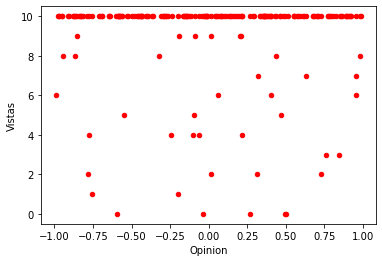

-------------------------------------------------------------------------------------
Muestra N: 500
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las 5 mas votadas, y 5 con mayor ratio Votos/Vista


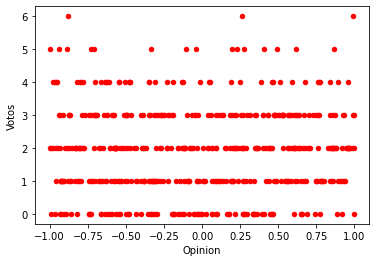

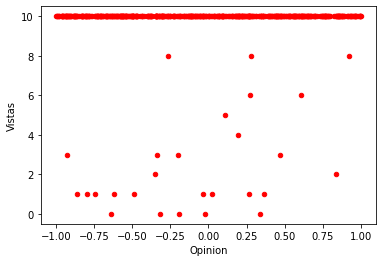

-------------------------------------------------------------------------------------
Muestra N: 1000
Opiniones univariadas, con una distribucion uniforme [-1,1]
Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las 5 mas votadas, y 5 con mayor ratio Votos/Vista


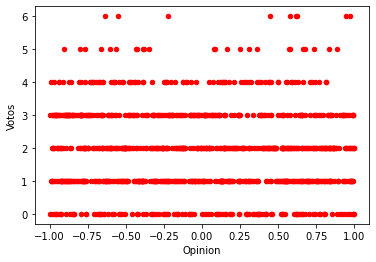

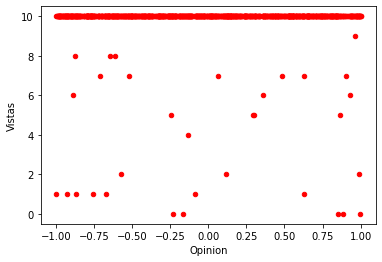

In [14]:
#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion V3 ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

#>>>>> Opinion univariada, con una distribucion uniforme en el rango [-1;1]
#>>>>> votacion positiva aleatoria de 2 ideas
#>>>>> Seleccion de ideas por ratio (5 (de las 10) ideas mas votadas, junto con 5 (de las 10) ideas con mayor ratio Votos/Vista)


# Defino a los agentes.
class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def votar (self, ideas): # Asume que se le da un dataframe con las opiniones
        Votara = ideas.sample (n=2)
        vota = []
        for i in Votara.index:
            vota.append (i)
        return vota # Me devuelve la id de la idea a votar     
    
    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []


# Creo la muestra, y les asigno la opinion
for q in TamañoDeLaMuestra:
    # Creo la muestra
    Muestra_Completa = {}
    for k in range (1,q):
        Muestra_Completa [k] = Person (np.random.uniform (-1,1),k*111) # Creo una muestra de sujetos con una Opinion distribuida uniformemente, 
                                                                       # y les asigno una id a los sujetos

            
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    Muestra_Simulacion = Muestra_Completa.copy()
    DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas','Ratio'])
    MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
    OpinanNoVotan = 0
    TiempoSimulacion = 0

    for i in Muestra_Simulacion:
        ParticipanteActual = i
        if OpinanNoVotan < 20: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
            DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [OpinanNoVotan,'Votos'] = 0
            DataSave.at [OpinanNoVotan,'Vistas'] = 0
            DataSave.at [OpinanNoVotan,'Ratio'] = 0
            OpinanNoVotan +=1
        else:
            OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
            OpinionesFiltradas.sort_values(by=['Votos'], ascending=False, inplace=True) # Ordeno las ideas de mayor a menor acorde a la cantidad de votos
            OpinionesMasVotadas = OpinionesFiltradas.iloc[:10, :2] # Creo un DF con las 10 Opiniones mas votadas
            OpinionesMasVotadasSeleccionadas = OpinionesMasVotadas.sample (n=5) # Selecciono 5 de las 10 opiniones mas votadas
            RestoDeOpiniones = OpinionesFiltradas.iloc[10:, :]
            RestoDeOpiniones.sort_values(by='Ratio', ascending=False, inplace=True)
            OpinionesConMayorRatio = RestoDeOpiniones.iloc[:10, :2]  # Creo un df con las 10 opiniones con mayor ratio
            OpinionesConMayorRatioSeleccionadas = OpinionesConMayorRatio.sample (n=5)  # Selecciono 5 de las 10 opiniones con mayor ratio
            OpinionesParaVotar = pd.concat([OpinionesMasVotadasSeleccionadas, OpinionesConMayorRatioSeleccionadas])
            Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
            DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
            DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
            DataSave.at [i,'Votos'] = 0
            DataSave.at [i,'Vistas'] = 0
            DataSave.at [i,'Ratio'] = 0
            VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
            for i in VotoActual:
                DataSave.at [i,'Votos'] = DataSave.at [i,'Votos'] + 1 # Le sumo un voto a la idea.
            for i in OpinionesParaVotar.index:
                DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas

                # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
                MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
                MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
                MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
                MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
                CopiaOpiniones = OpinionesParaVotar.index.tolist()
                CopiaOpiniones.remove(i)
                MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
                if (DataSave.at [VotoActual[0],'ID']) == (OpinionesParaVotar.at [i,'ID']) or (DataSave.at [VotoActual[1],'ID']) == (OpinionesParaVotar.at [i,'ID']):
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
                else:
                    MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
                MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
                TiempoSimulacion +=1           
    
    
    ##### Visualizo la data
    # print (MinutoAMinuto)
    print ("-------------------------------------------------------------------------------------")
    print ("Muestra N: " + str(q))
    print ("Opiniones univariadas, con una distribucion uniforme [-1,1]")
    print ("Algoritmo de votacion positiva de 2 ideas aleatorias, del conjunto de las 5 mas votadas, y 5 con mayor ratio Votos/Vista")
    #print (DataSave.sort_values(by=['Votos'], ascending=False))
    DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
    #plt.yticks(range(5))
    plt.show()


